# Exploring Face Recognition Techniques using Machine Learning and Dimensionality Reduction

# By:- Shubhkirti (21CSU273) and Aditya (21CSU272)

<img src="1_DPNoWJ3Au35Fw58Sn2oj1w.png" alt="Facial Recognition" style="width: 500px; height: auto;"/>

## Introduction

### Face recognition is a crucial task in computer vision with applications ranging from security systems to social media tagging. Machine learning, combined with dimensionality reduction techniques such as PCA, offers efficient methods for face recognition. In this study, we explore various machine learning algorithms applied to PCA-transformed face images to achieve accurate recognition.

## Objective

<img src="1_5Czvja6jgDIiVWu3pewDsg.jpg" alt="Objective" style="width: 500px; height: auto;"/>

### The objective of this study is to evaluate the performance of different machine learning algorithms for face recognition using PCA as a dimensionality reduction technique. Additionally, we aim to determine the optimal number of principal components and assess the impact of clustering algorithms on face recognition.

## Methodology

<img src="1_dYD_bnPslZJ61MSkOwJt_g.png" alt="Methodology" style="width: 500px; height: auto;"/>

### 1. Data Preparation: Loaded the Olivetti Faces dataset and preprocessed it.
### 2. Dimensionality Reduction: Applied PCA to reduce the dimensionality of the face images.
### 3. Clustering Analysis: Explored the impact of clustering algorithms such as Agglomerative Clustering on face recognition.
### 4. Model Training and Evaluation: Trained various machine learning models on the PCA-transformed data and evaluate their performance using cross-validation and test sets.
### 5. Visualization: Visualized the results, including average faces, eigenfaces, confusion matrices, and classification reports.
### 6. Comparison and Discussion: Compared the performance of different algorithms, discuss their strengths and weaknesses, and interpreted the results.

## Dataset Description 

### 1. There are ten different image of each of 40 distinct people.
### 2. There are 400 face images in the dataset.
### 3. Face images were taken at different times, variying ligthing, facial express and facial detail.
### 4. All face images have black background.
### 5. The images are gray level.
### 6. Size of each image is 64x64.
### 7. Image pixel values were scaled to [0, 1] interval.
### 8. Names of 40 people were encoded to an integer from 0 to 39.
### Dataset Link https://www.kaggle.com/datasets/imrandude/olivetti/data

<img src="dataset-definiton.png" alt="Dataset" style="width: 500px; height: auto;"/>

### Importing Libraries 

#### Importing essential libraries for data manipulation and machine learning, including scikit-learn modules for classification and dimensionality reduction, as well as NumPy and Pandas for data handling and Matplotlib for visualization.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
import mglearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


### Data Loading and Description 

#### Loading the Olivetti Faces dataset and its targets, then printing the total number of images and unique targets, along with the size of each image and pixel value details.

In [3]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [4]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [5]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


### Show 40 Distinct People in the Olivetti Dataset

#### Defined a function to visualize 40 distinct faces from the dataset. It creates a 4x10 grid of subplots within a specified figure size, iterates over unique IDs, selects the first image for each ID, and displays it in grayscale. Finally, it sets titles for each subplot and a super title indicating the total number of distinct people in the dataset.

In [6]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

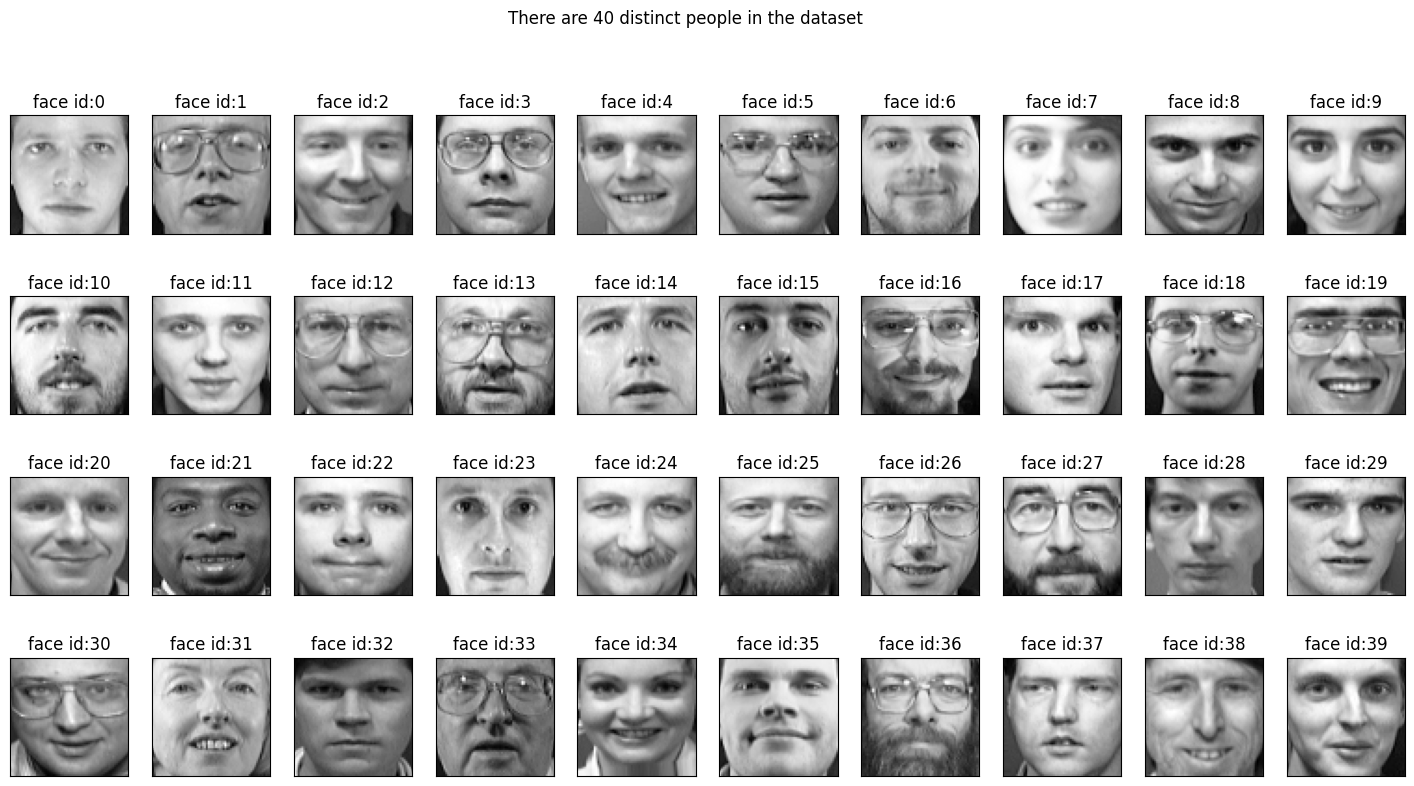

In [7]:
show_40_distinct_people(data, np.unique(target))

#### As seen in the photo gallery above, the dataset has 40 different person-owned, facial images.

<a class="anchor" id="2.2.">

### Show 10 Face Images of Selected Target

#### Defined a function to display 10 face images for each specified subject ID. It calculates the number of rows needed based on the number of subject IDs provided, then creates subplots accordingly. Within each subplot, it iterates over each subject ID, selects 10 face images per subject, and displays them in grayscale with titles indicating the respective subject ID. Finally, it calls the function with specified parameters to display face images for selected subject IDs.

In [8]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10 #each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

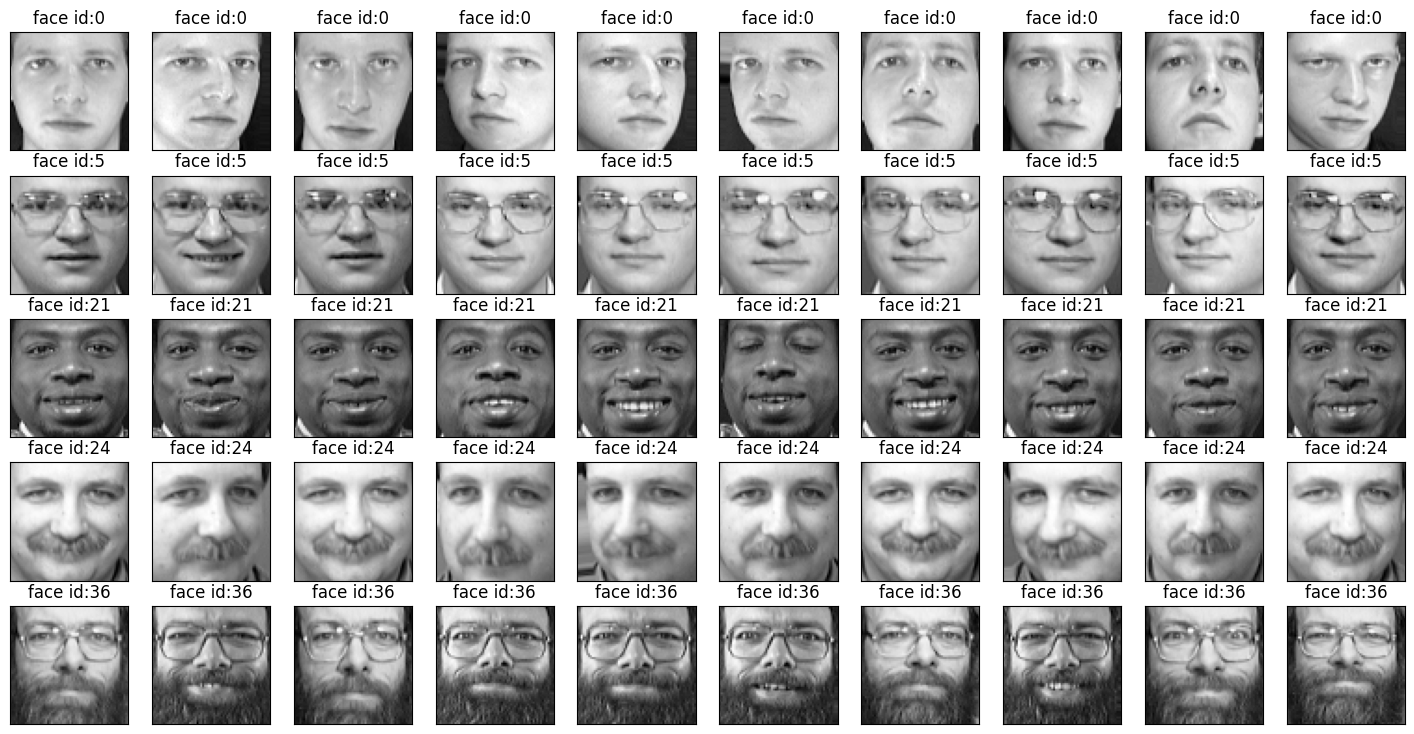

In [9]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

#### Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail (glasses, beard).

### Machine Learning Model for Face Recognition 

#### Reshaped the data into a 2D array, split it into training and testing sets while maintaining class proportions, and visualized the distribution of samples per class. Further splits the data into training, testing, and validation sets using StratifiedShuffleSplit to ensure balanced class distributions across sets.

#### Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [10]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


### Split data and target into random train and test subsets 

#### The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Used stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject.

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [12]:
n_samples, n_features, n_dims = data.shape
data_2d = data.reshape(n_samples, -1)


stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


train_indices, test_indices = next(stratified_split.split(data_2d, target))


data_train = data_2d[train_indices]
data_test_val = data_2d[test_indices]
target_train = target[train_indices]
target_test_val = target[test_indices]


stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
test_indices, val_indices = next(stratified_split.split(data_test_val, target_test_val))


data_test = data_test_val[test_indices]
data_val = data_test_val[val_indices]
target_test = target_test_val[test_indices]
target_val = target_test_val[val_indices]


print("data_train shape:", data_train.shape)
print("target_train shape:", target_train.shape)
print("data_test shape:", data_test.shape)
print("target_test shape:", target_test.shape)
print("data_val shape:", data_val.shape)
print("target_val shape:", target_val.shape)

data_train shape: (320, 4096)
target_train shape: (320,)
data_test shape: (40, 4096)
target_test shape: (40,)
data_val shape: (40, 4096)
target_val shape: (40,)


### PCA, Clustering Analysis and Face Visualization

#### Used PCA to reduce dimensionality while retaining 99% of the variance in the data.

In [13]:
pca = PCA(0.99)
data_pca = pca.fit_transform(data_2d)
data_train_pca = pca.fit_transform(data_train)
data_val_pca = pca.transform(data_val)
data_test_pca = pca.transform(data_test)

In [14]:
pca.n_components_

222

#### Experimented with Agglomerative Clustering using different distance metrics (Euclidean, Manhattan, and Cosine) and linkage criteria (Complete, Average, and Single). For each combination, silhouette scores are computed across a range of cluster numbers from 5 to 200, incrementing by 5. The silhouette scores are then plotted against the number of clusters for visualization, with the highest scores highlighted by red square markers. Subsequently, the results are tabulated, showcasing the best number of clusters and their corresponding silhouette scores for each configuration. Finally, the best Agglomerative Clustering model with 120 clusters is applied to the training data, and faces within each cluster are visualized along with their corresponding labels.

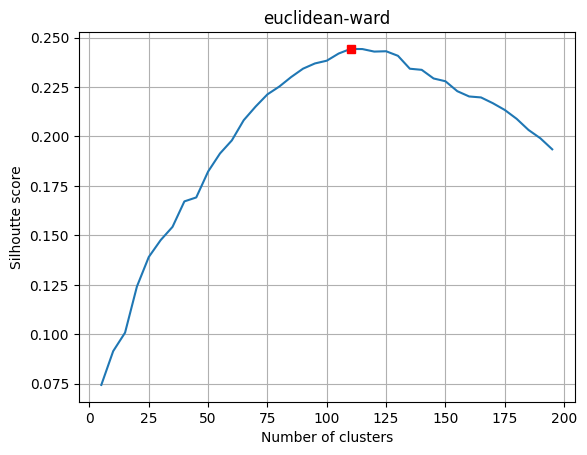

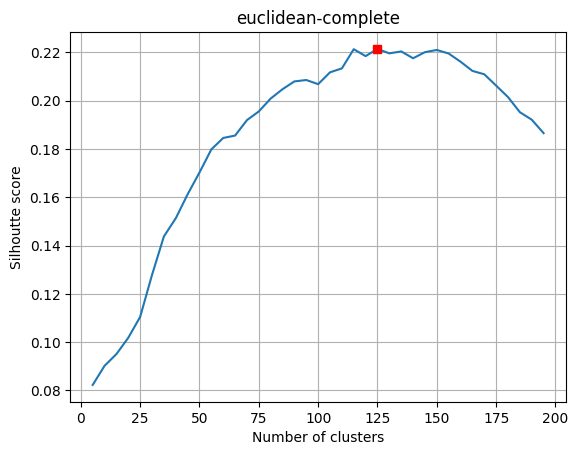

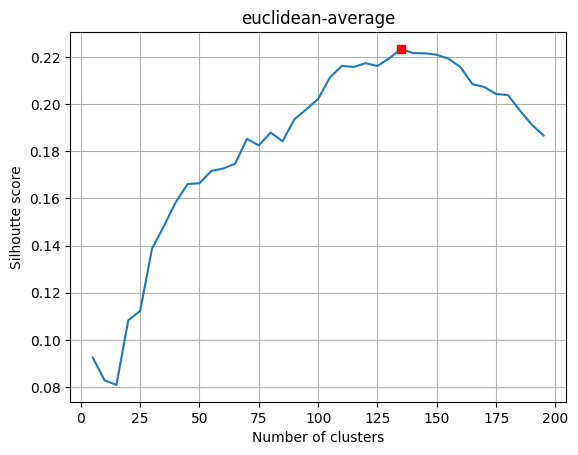

In [15]:
# euclidean-ward
k_range = range(5, 200, 5)
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='ward')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_euclidean_ward = np.argmax(silhouette_scores)
best_k_euclidean_ward = k_range[best_index_euclidean_ward]
best_score_euclidean_ward = silhouette_scores[best_index_euclidean_ward]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-ward')
plt.plot(best_k_euclidean_ward, best_score_euclidean_ward, "rs")
plt.grid()
plt.show()

# euclidean-complete
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_euclidean_complete = np.argmax(silhouette_scores)
best_k_euclidean_complete = k_range[best_index_euclidean_complete]
best_score_euclidean_complete = silhouette_scores[best_index_euclidean_complete]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-complete')
plt.plot(best_k_euclidean_complete, best_score_euclidean_complete, "rs")
plt.grid()
plt.show()

# euclidean-average
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_euclidean_average = np.argmax(silhouette_scores)
best_k_euclidean_average = k_range[best_index_euclidean_average]
best_score_euclidean_average = silhouette_scores[best_index_euclidean_average]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-average')
plt.plot(best_k_euclidean_average, best_score_euclidean_average, "rs")
plt.grid()
plt.show()

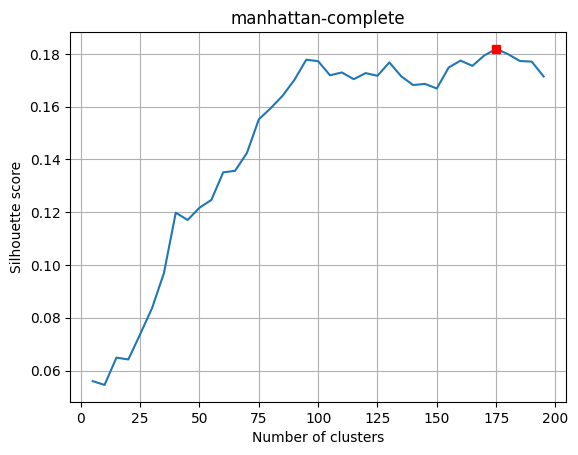

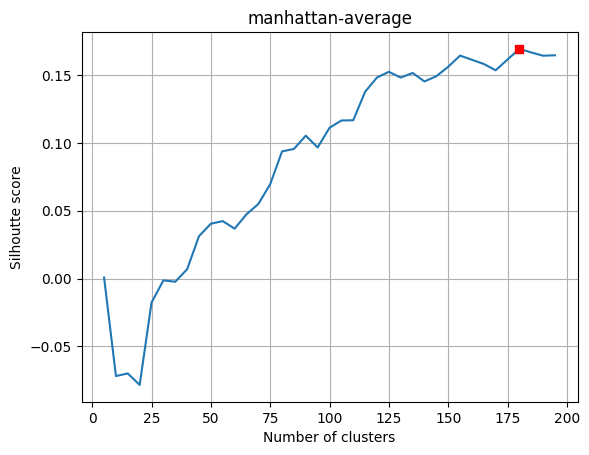

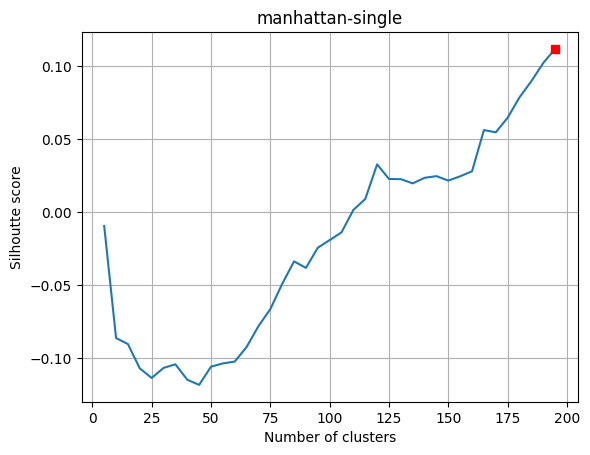

In [16]:
# manhattan-complete
k_range = range(5, 200, 5)
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                             metric='manhattan',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(data_train_pca)  # Assuming data_train_pca is defined
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))

best_index_manhattan_complete = np.argmax(silhouette_scores)
best_k_manhattan_complete = k_range[best_index_manhattan_complete]
best_score_manhattan_complete = silhouette_scores[best_index_manhattan_complete]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('manhattan-complete')
plt.plot(best_k_manhattan_complete, best_score_manhattan_complete, "rs")
plt.grid()
plt.show()



# manhattan-average
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='manhattan',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_manhattan_average = np.argmax(silhouette_scores)
best_k_manhattan_average = k_range[best_index_manhattan_average]
best_score_manhattan_average = silhouette_scores[best_index_manhattan_average]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('manhattan-average')
plt.plot(best_k_manhattan_average, best_score_manhattan_average, "rs")
plt.grid()
plt.show()

# manhattan-single
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='manhattan',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_manhattan_single = np.argmax(silhouette_scores)
best_k_manhattan_single = k_range[best_index_manhattan_single]
best_score_manhattan_single = silhouette_scores[best_index_manhattan_single]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('manhattan-single')
plt.plot(best_k_manhattan_single, best_score_manhattan_single, "rs")
plt.grid()
plt.show()

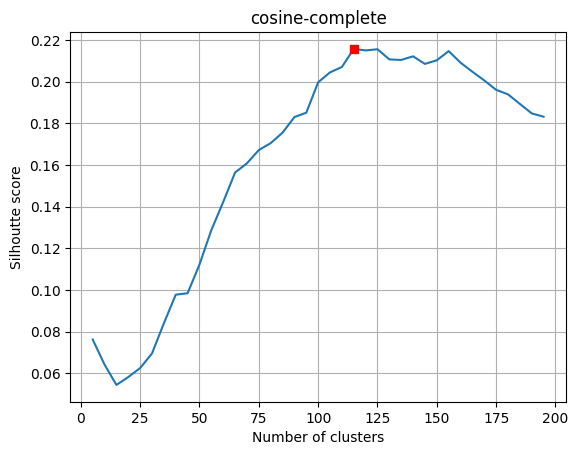

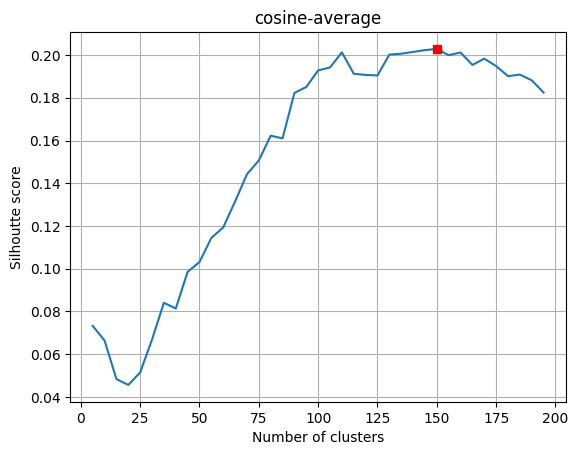

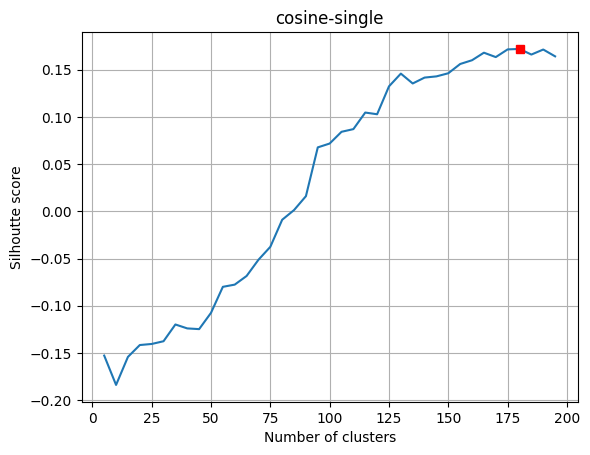

In [17]:
# cosine-complete
k_range = range(5, 200, 5)
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_cosine_complete = np.argmax(silhouette_scores)
best_k_cosine_complete = k_range[best_index_cosine_complete]
best_score_cosine_complete = silhouette_scores[best_index_cosine_complete]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-complete')
plt.plot(best_k_cosine_complete, best_score_cosine_complete, "rs")
plt.grid()
plt.show()

# cosine-average
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_cosine_average = np.argmax(silhouette_scores)
best_k_cosine_average = k_range[best_index_cosine_average]
best_score_cosine_average = silhouette_scores[best_index_cosine_average]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-average')
plt.plot(best_k_cosine_average, best_score_cosine_average, "rs")
plt.grid()
plt.show()

# cosine-single
silhouette_scores = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(data_train_pca)
    silhouette_scores.append(silhouette_score(data_train_pca, agg_labels))
    
best_index_cosine_single = np.argmax(silhouette_scores)
best_k_cosine_single = k_range[best_index_cosine_single]
best_score_cosine_single = silhouette_scores[best_index_cosine_single]
    
plt.plot(range(5, 200, 5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-single')
plt.plot(best_k_cosine_single, best_score_cosine_single, "rs")
plt.grid()
plt.show()

In [18]:
results = {
    "Configuration": ["euclidean-ward", "euclidean-complete", "euclidean-average",
                      "manhattan-complete", "manhattan-average", "manhattan-single", 
                      "cosine-complete", "cosine-average", "cosine-single"],
    "Best K": [best_k_euclidean_ward, best_k_euclidean_complete, best_k_euclidean_average, 
               best_k_manhattan_complete, best_k_manhattan_average, best_k_manhattan_single, 
               best_k_cosine_complete, best_k_cosine_average, best_k_cosine_single],
    "Best Silhouette Score": [best_score_euclidean_ward, best_score_euclidean_complete, best_score_euclidean_average,  
                              best_score_manhattan_complete, best_score_manhattan_average, best_score_manhattan_single, 
                              best_score_cosine_complete, best_score_cosine_average, best_score_cosine_single]
}

df_results = pd.DataFrame(results)
print(df_results)

        Configuration  Best K  Best Silhouette Score
0      euclidean-ward     110               0.244253
1  euclidean-complete     125               0.221456
2   euclidean-average     135               0.223342
3  manhattan-complete     175               0.181881
4   manhattan-average     180               0.169219
5    manhattan-single     195               0.111871
6     cosine-complete     115               0.215774
7      cosine-average     150               0.202875
8       cosine-single     180               0.172097


In [19]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Cluster 0


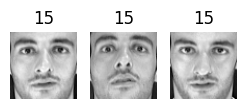

Cluster 1


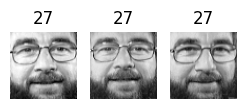

Cluster 2


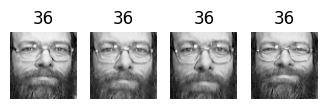

Cluster 3


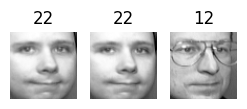

Cluster 4


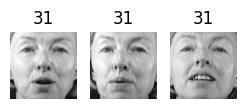

Cluster 5


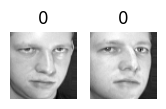

Cluster 6


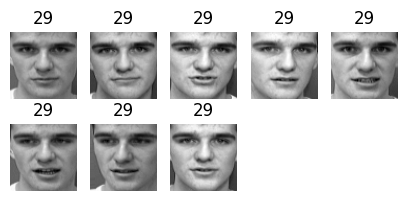

Cluster 7


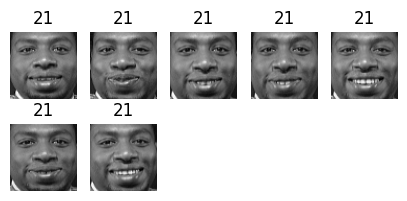

Cluster 8


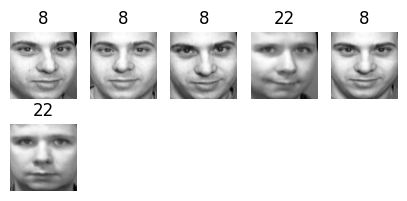

Cluster 9


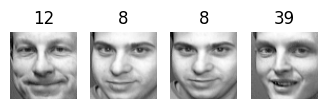

Cluster 10


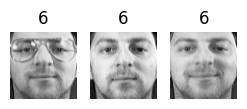

Cluster 11


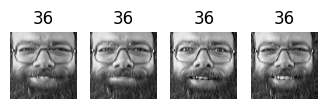

Cluster 12


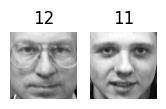

Cluster 13


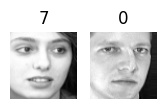

Cluster 14


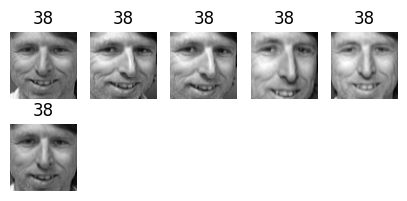

Cluster 15


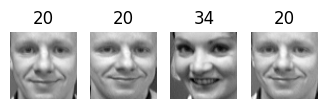

Cluster 16


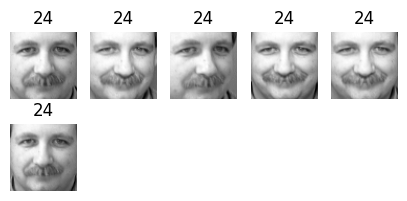

Cluster 17


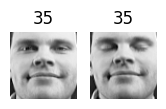

Cluster 18


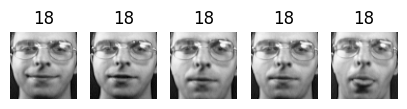

Cluster 19


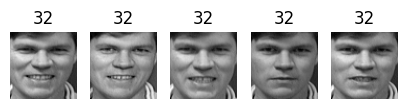

Cluster 20


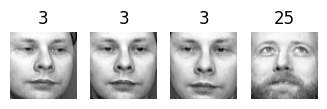

Cluster 21


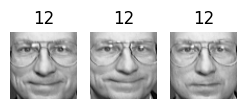

Cluster 22


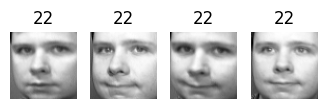

Cluster 23


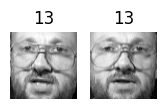

Cluster 24


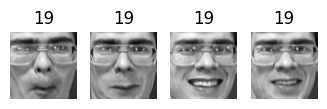

Cluster 25


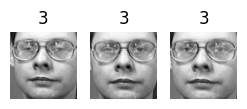

Cluster 26


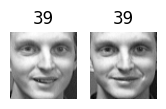

Cluster 27


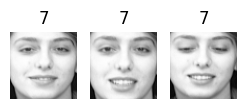

Cluster 28


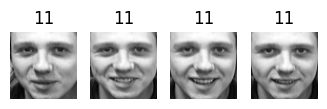

Cluster 29


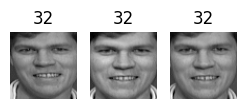

Cluster 30


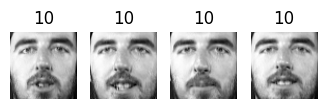

Cluster 31


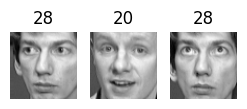

Cluster 32


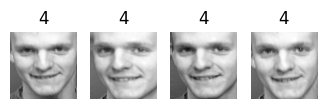

Cluster 33


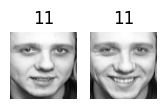

Cluster 34


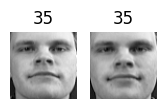

Cluster 35


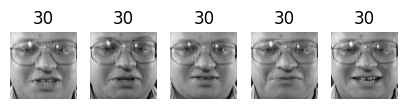

Cluster 36


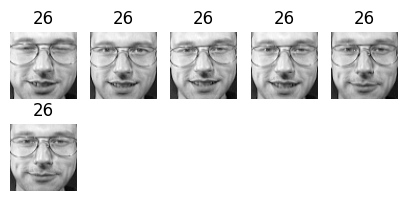

Cluster 37


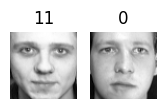

Cluster 38


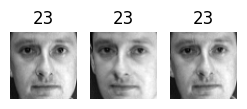

Cluster 39


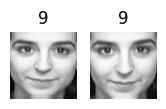

Cluster 40


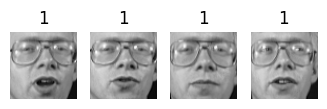

Cluster 41


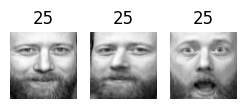

Cluster 42


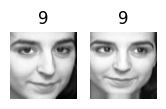

Cluster 43


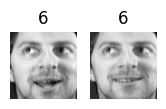

Cluster 44


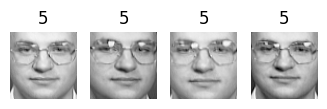

Cluster 45


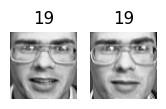

Cluster 46


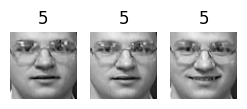

Cluster 47


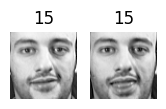

Cluster 48


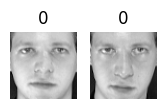

Cluster 49


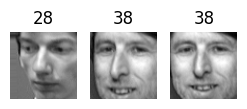

Cluster 50


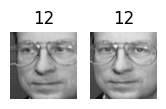

Cluster 51


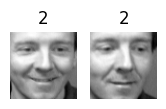

Cluster 52


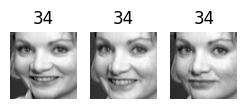

Cluster 53


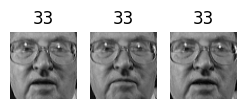

Cluster 54


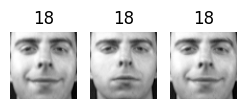

Cluster 55


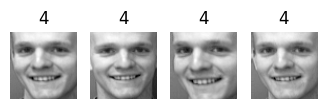

Cluster 56


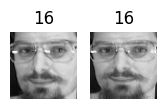

Cluster 57


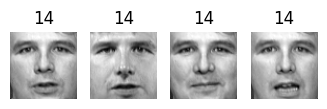

Cluster 58


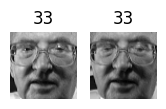

Cluster 59


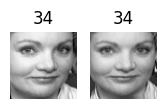

Cluster 60


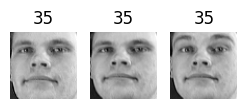

Cluster 61


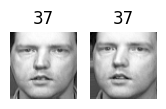

Cluster 62


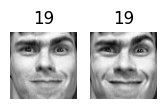

Cluster 63


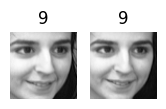

Cluster 64


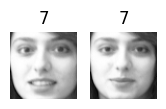

Cluster 65


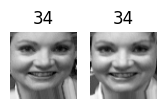

Cluster 66


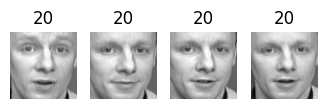

Cluster 67


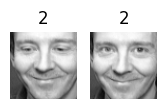

Cluster 68


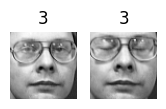

Cluster 69


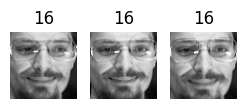

Cluster 70


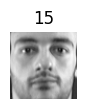

Cluster 71


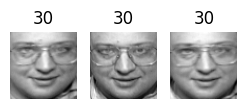

Cluster 72


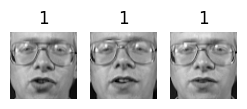

Cluster 73


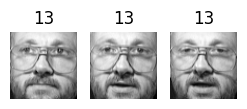

Cluster 74


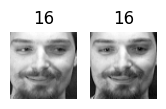

Cluster 75


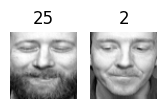

Cluster 76


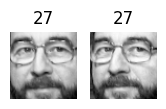

Cluster 77


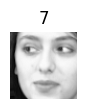

Cluster 78


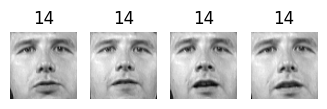

Cluster 79


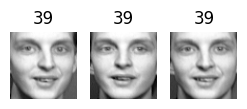

Cluster 80


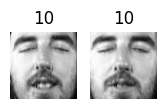

Cluster 81


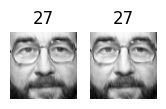

Cluster 82


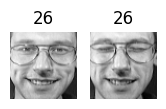

Cluster 83


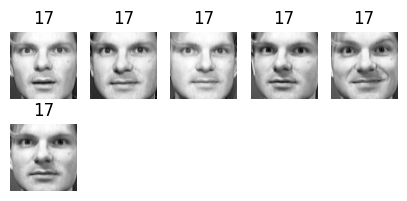

Cluster 84


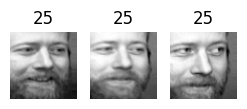

Cluster 85


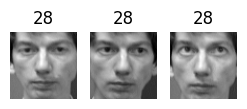

Cluster 86


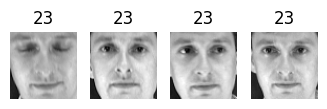

Cluster 87


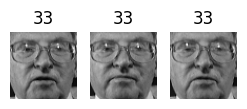

Cluster 88


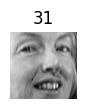

Cluster 89


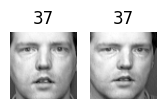

Cluster 90


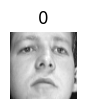

Cluster 91


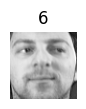

Cluster 92


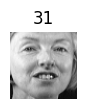

Cluster 93


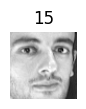

Cluster 94


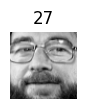

Cluster 95


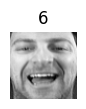

Cluster 96


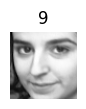

Cluster 97


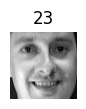

Cluster 98


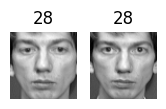

Cluster 99


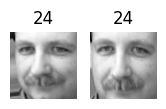

Cluster 100


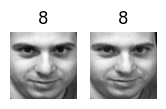

Cluster 101


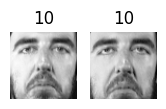

Cluster 102


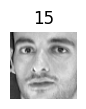

Cluster 103


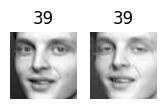

Cluster 104


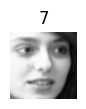

Cluster 105


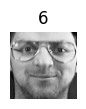

Cluster 106


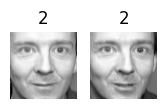

Cluster 107


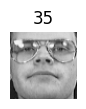

Cluster 108


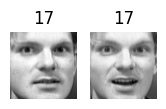

Cluster 109


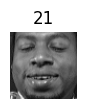

Cluster 110


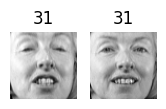

Cluster 111


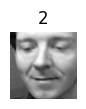

Cluster 112


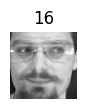

Cluster 113


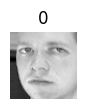

Cluster 114


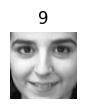

Cluster 115


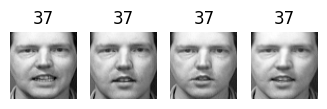

Cluster 116


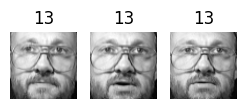

Cluster 117


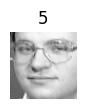

Cluster 118


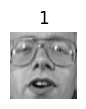

Cluster 119


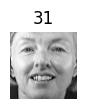

In [20]:
best_agg_clustering = AgglomerativeClustering(n_clusters = 120,
                                             metric='euclidean',
                                             linkage='ward')

best_agg_labels = best_agg_clustering.fit_predict(data_train_pca)

for cluster_id in np.unique(best_agg_labels):
    print("Cluster", cluster_id)
    in_cluster = best_agg_labels==cluster_id
    faces = data_train[in_cluster]
    labels = target_train[in_cluster]
    plot_faces(faces, labels)

#### Employed PCA to reduce the dimensionality of the Olivetti Faces dataset to principal components. Then visualized the dataset in this reduced space, coloring each point according to its target label (representing a person). Additionally, displayed a color bar to indicate the correspondence between colors and people. Finally, plotted the explained variances of all principal components, providing insights into the amount of variance captured by each component.

In [21]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [22]:
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

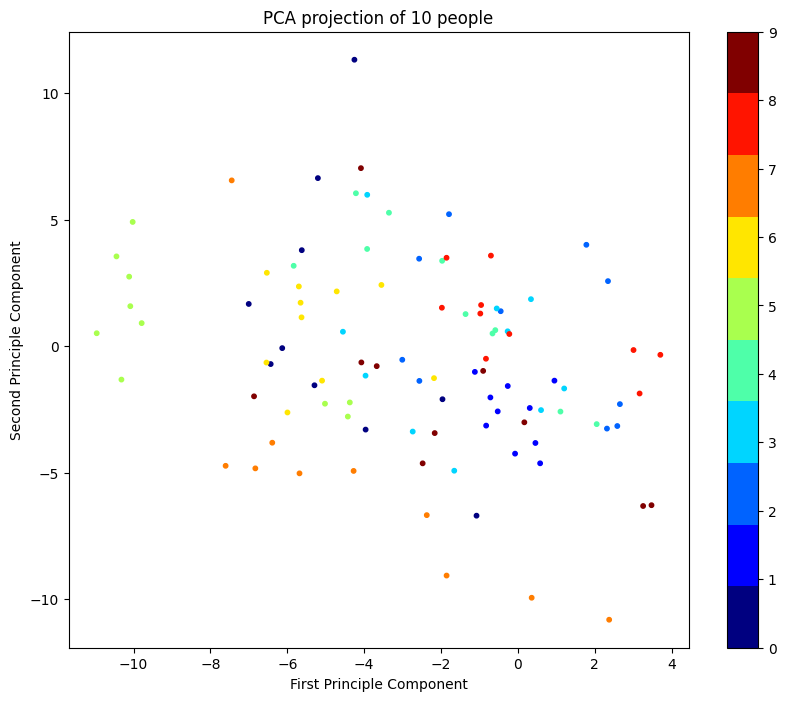

In [23]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

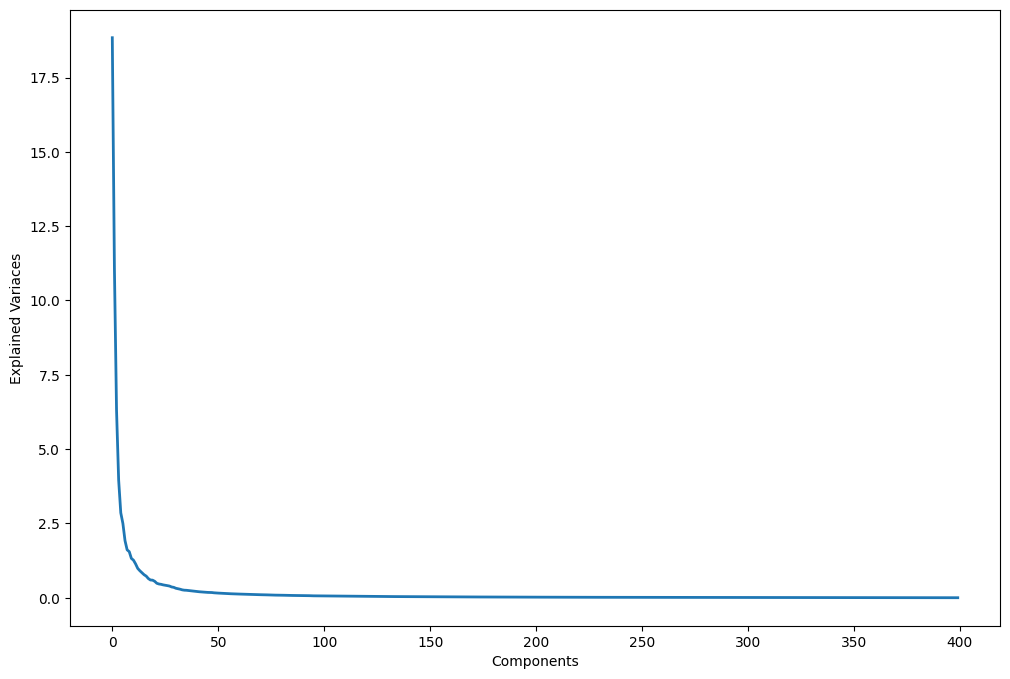

In [24]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

#### In the figure above, it can be seen that 90 and more PCA components represent the same data. Now let's make the classification process using 90 PCA components.

#### Displayed the average face of the dataset then calculated and displays the eigenfaces, which represent the principal components capturing the most variation in the dataset. 
#### Each subplot represents an eigenface, showing the features that contribute most to the variation in the dataset.

### For 90 components

In [25]:
n_components=90

In [26]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(data_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

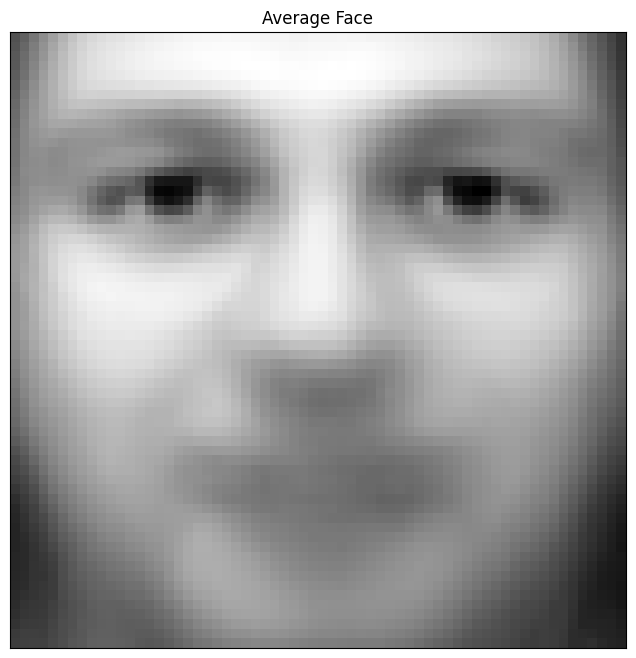

In [27]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

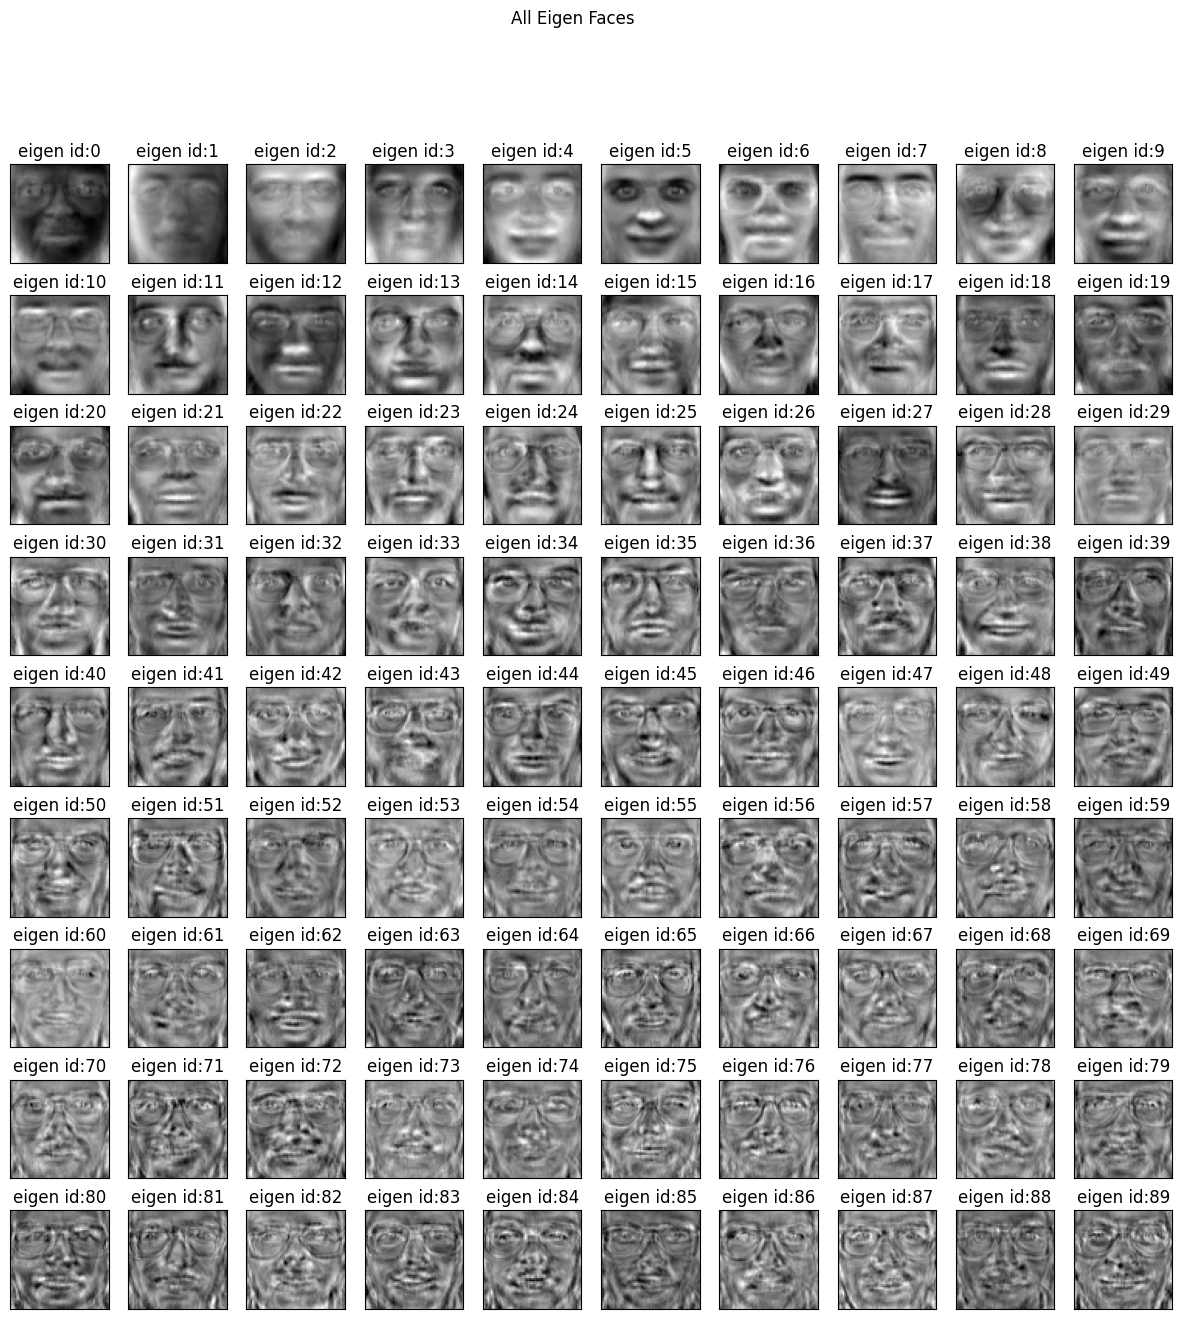

In [28]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

### Classification

#### Evaluated the performance of various classifiers using the transformed PCA features on the test data.

In [29]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [30]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(data_train_pca, target_train)

    y_pred=clf.predict(data_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(target_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.95

========== LR RESULT ==========
Accuracy score:0.97

========== NB RESULT ==========
Accuracy score:0.88

========== KNN RESULT ==========
Accuracy score:0.85

========== DT RESULT ==========
Accuracy score:0.50

========== SVM RESULT ==========
Accuracy score:0.93



### Validation

#### 5-fold Cross-validation to assess the performance of various classifiers using PCA-transformed features. Additionally, fitted a Linear Discriminant Analysis (LDA) model on the PCA-transformed training data and evaluates its performance on the test data.

In [31]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.94
NB mean cross validations score:0.77
KNN mean cross validations score:0.71
DT mean cross validations score:0.48
SVM mean cross validations score:0.88


In [32]:
print("Classification Results:\n{}".format(metrics.classification_report(target_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

### For 50 components

In [33]:
n_components=50

In [34]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(data_train)

PCA(n_components=50, whiten=True)

Text(0.5, 1.0, 'Average Face')

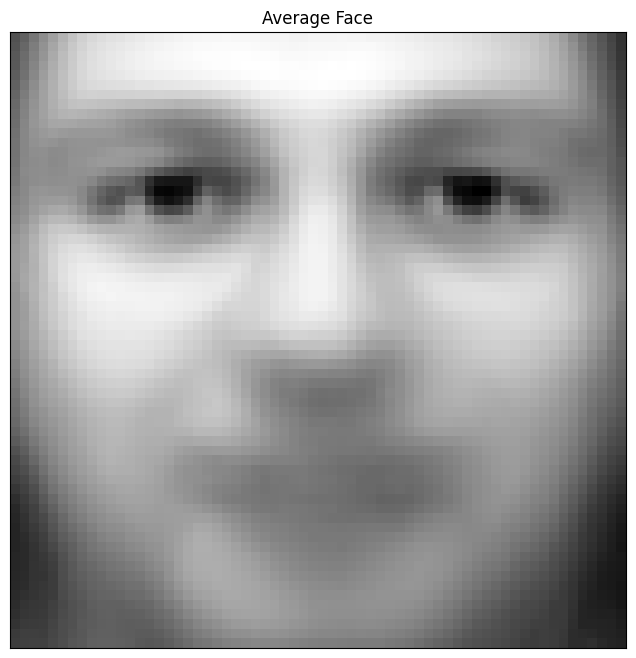

In [35]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

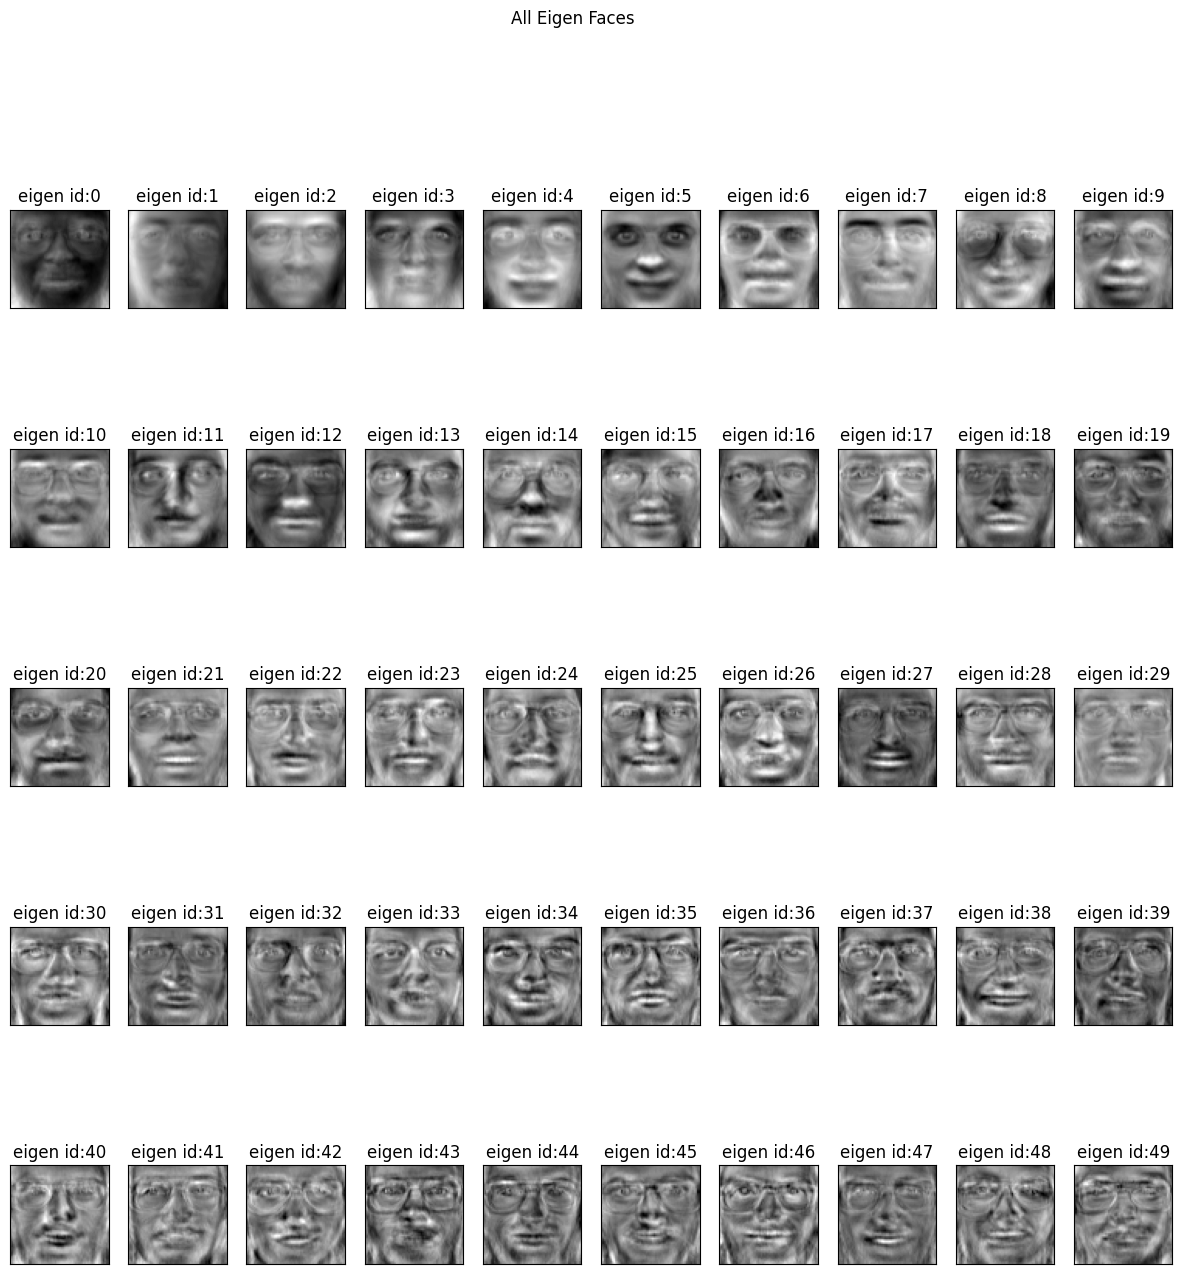

In [36]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [37]:
X_train_pca=pca.transform(data_train)
X_test_pca=pca.transform(data_test)

In [38]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(data_train_pca, target_train)

    y_pred=clf.predict(data_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(target_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.95

========== LR RESULT ==========
Accuracy score:0.97

========== NB RESULT ==========
Accuracy score:0.88

========== KNN RESULT ==========
Accuracy score:0.85

========== DT RESULT ==========
Accuracy score:0.55

========== SVM RESULT ==========
Accuracy score:0.93



In [39]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.98
LR mean cross validations score:0.96
NB mean cross validations score:0.82
KNN mean cross validations score:0.82
DT mean cross validations score:0.53
SVM mean cross validations score:0.93


In [40]:
print("Classification Results:\n{}".format(metrics.classification_report(target_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

### For 150 components

In [41]:
n_components=150

In [42]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(data_train)

PCA(n_components=150, whiten=True)

Text(0.5, 1.0, 'Average Face')

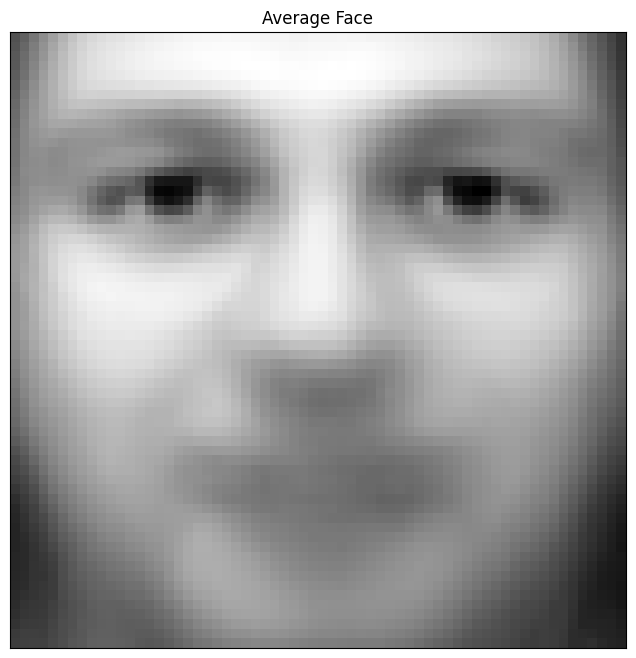

In [43]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

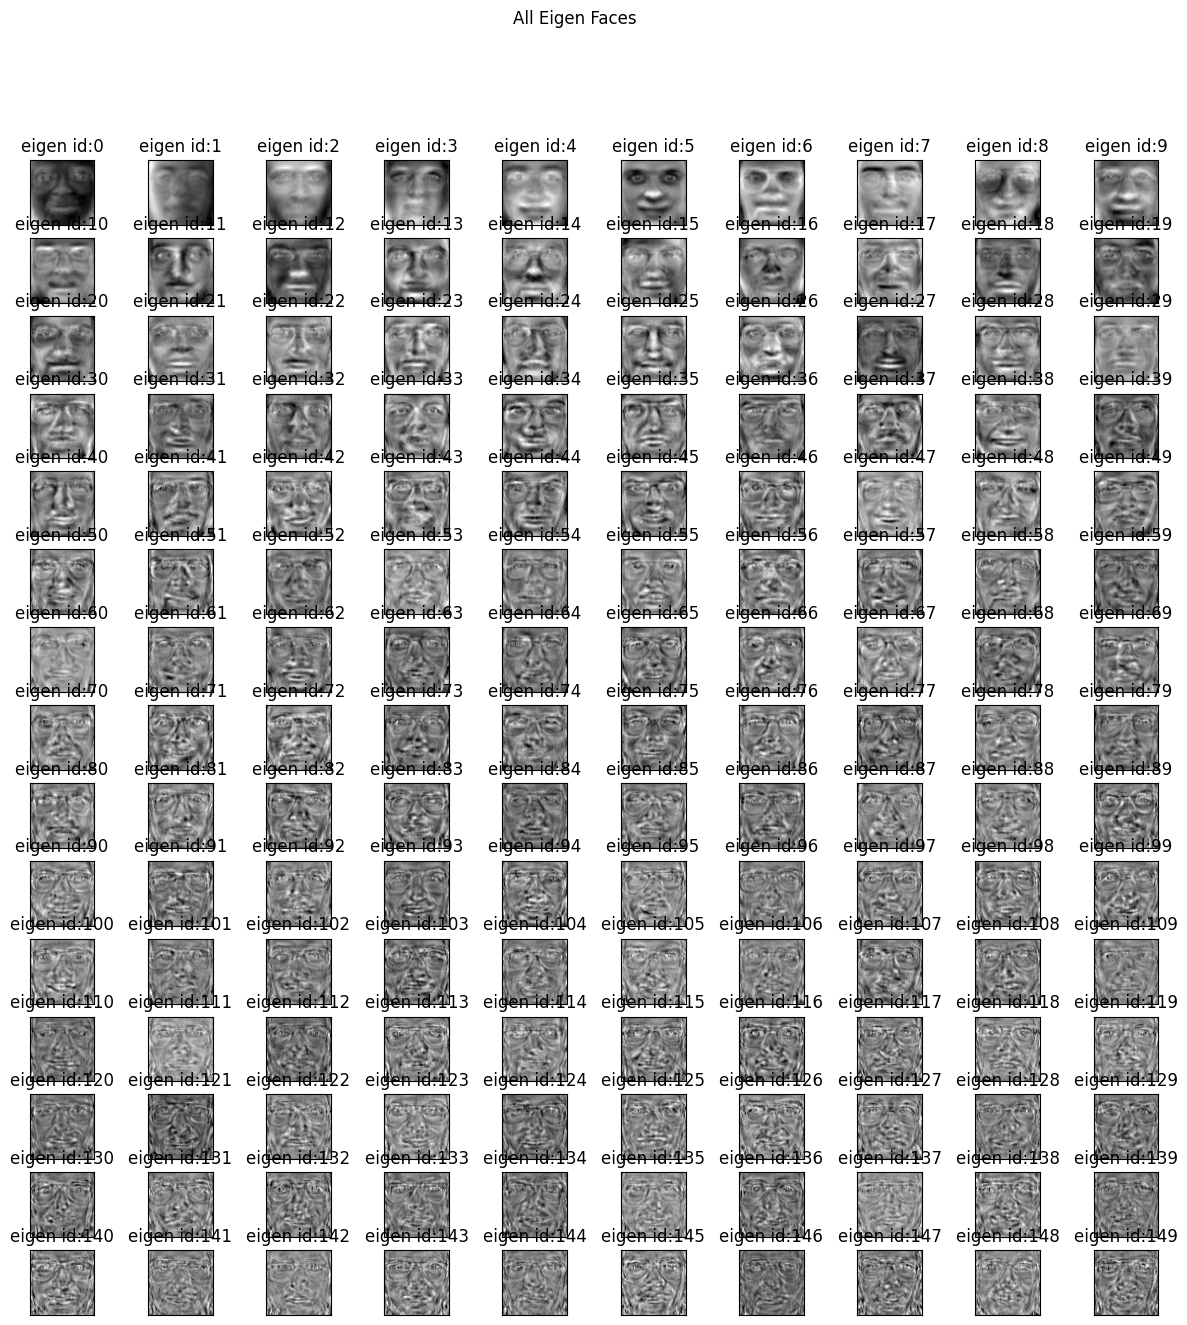

In [44]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [45]:
X_train_pca=pca.transform(data_train)
X_test_pca=pca.transform(data_test)

In [46]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(data_train_pca, target_train)

    y_pred=clf.predict(data_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(target_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.95

========== LR RESULT ==========
Accuracy score:0.97

========== NB RESULT ==========
Accuracy score:0.88

========== KNN RESULT ==========
Accuracy score:0.85

========== DT RESULT ==========
Accuracy score:0.50

========== SVM RESULT ==========
Accuracy score:0.93



In [47]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.92
NB mean cross validations score:0.70
KNN mean cross validations score:0.44
DT mean cross validations score:0.47
SVM mean cross validations score:0.72


In [48]:
print("Classification Results:\n{}".format(metrics.classification_report(target_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

## Results

### 1. As seen in the photo gallery above, the dataset has 40 different person-owned, facial images.
### 2. Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail (glasses, beard).
### 3. Comparison of different measures and linkage methods for clustering is given below:-

![Table](Table.png)

### 4. Comparison of different PCA components is given below:-

![Table2](Table2.png)

## Discussions

### 1. LR consistently performs the best across all configurations in terms of accuracy, closely followed by SVM.
### 2. LDA maintains high accuracy but shows a slight decrease when the number of components increases to 150.
### 3. Decision Trees (DT) exhibit a significant drop in accuracy, especially with higher component numbers, suggesting struggles in capturing data complexity with increasing dimensionality.
### 4. LDA demonstrates robustness across datasets, with consistently high mean cross-validation scores.
### 5. LR also maintains high cross-validation scores but slightly decreases with higher component numbers.
### 6. Naive Bayes (NB) shows decent cross-validation scores but lags behind LDA and LR.
### 7. KNN's cross-validation scores notably decrease with higher dimensions, indicating potential struggles in generalizing to higher-dimensional data.
### 8. DT performs the worst in terms of cross-validation scores, suggesting instability and sensitivity to dataset variations.
### 9. LR and SVM emerge as top-performing algorithms in both accuracy and cross-validation, making them reliable choices for classification tasks. However, considerations like computational efficiency and interpretability should also influence the algorithm choice.

## Conclusion

### In this study, we explored the application of machine learning algorithms and dimensionality reduction techniques for face recognition tasks. Our analysis revealed the effectiveness of Principal Component Analysis (PCA) in reducing the dimensionality of face images while retaining essential features. The experiments with various machine learning models showcased the robust performance of Support Vector Machines (SVM) and Logistic Regression (LR) in accurately recognizing faces.

### Additionally, we delved into the impact of clustering algorithms on face recognition and discovered that techniques like Agglomerative Clustering can uncover underlying patterns in the data, potentially enhancing classification performance.

### Our study contributes significantly to the burgeoning field of computer vision by demonstrating the potential of machine learning techniques for face recognition. While our results are promising, further exploration is warranted, including the investigation of advanced algorithms and larger datasets. Moreover, the integration of deep learning approaches holds promise for achieving even higher accuracy and scalability.

### In conclusion, our findings underscore the significance of harnessing machine learning and dimensionality reduction techniques for face recognition applications. This advancement paves the way for improved security systems, personalized user experiences, and progress in various fields such as healthcare and surveillance.

## References
### https://nayakpplaban.medium.com/building-an-application-for-facial-recognition-using-python-opencv-transformers-and-qdrant-a144871f40d9
### https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78
### https://medium.com/@anandshreyas2103/a-simple-guide-to-facial-recognition-fa6190dde68
### https://www.cs.cmu.edu/~tom/files/MachineLearningTomMitchell.pdf

<img src="41nE7lCEJiL._AC_UF1000,1000_QL80_.jpg" alt="Thank You" style="width: 500px; height: auto;"/>